# Mean Normalization

In machine learning we use large amounts of data to train our models. Some machine learning algorithms may require that the data is *normalized* in order to work correctly. The idea of normalization, also known as *feature scaling*, is to ensure that all the data is on a similar scale, *i.e.* that all the data takes on a similar range of values. For example, we might have a dataset that has values between 0 and 5,000. By normalizing the data we can make the range of values be between 0 and 1.




In this lab, you will be performing a different kind of feature scaling known as *mean normalization*. Mean normalization will scale the data, but instead of making the values be between 0 and 1, it will distribute the values evenly in some small interval around zero. For example, if we have a dataset that has values between 0 and 5,000, after mean normalization the range of values will be distributed in some small range around 0, for example between -3 to 3. Because the range of values are distributed evenly around zero, this guarantees that the average (mean) of all elements will be zero. Therefore, when you perform *mean normalization* your data will not only be scaled but it will also have an average of zero. 

# To Do:

You will start by importing NumPy and creating a rank 2 ndarray of random integers between 0 and 5,000 (inclusive) with 1000 rows and 20 columns. This array will simulate a dataset with a wide range of values. Fill in the code below

In [6]:
# import NumPy into Python
import numpy as np

In [27]:
# Create a 1000 x 20 ndarray with random integers in the half-open interval [0, 5001).
X = np.random.randint(low = 0, high = 5001, size=(1000,20))
    
# print the shape of X
print(X)
X.shape

[[1343 1026 4110 ... 1270 4320 2588]
 [3407  766 4397 ... 2065 2683 2186]
 [1046 2224 3436 ... 3569 1359 4824]
 ...
 [4525 4295  340 ... 1862 3860 4789]
 [2230 4440 2300 ...  933  215 4661]
 [ 639 4637 3086 ... 3906  893 4710]]


(1000, 20)

Now that you created the array we will mean normalize it. We will perform mean normalization using the following equation:

$\mbox{Norm_Col}_i = \frac{\mbox{Col}_i - \mu_i}{\sigma_i}$

where $\mbox{Col}_i$ is the $i$th column of $X$, $\mu_i$ is average of the values in the $i$th column of $X$, and $\sigma_i$ is the standard deviation of the values in the $i$th column of $X$. In other words, mean normalization is performed by subtracting from each column of $X$ the average of its values, and then by dividing by the standard deviation of its values. In the space below, you will first calculate the average and standard deviation of each column of $X$. 

Remark: difference between 'mean' and 'normal' normalization:

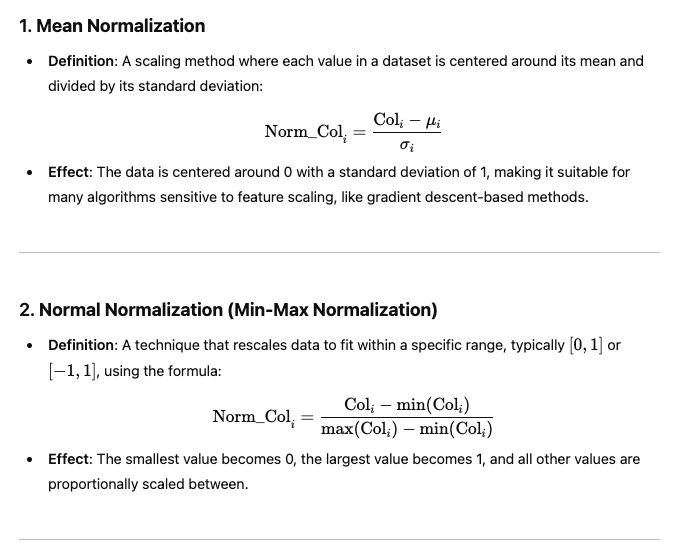

In [12]:
# Average of the values in each column of X
ave_cols = np.mean(X, axis=0)

# Standard Deviation of the values in each column of X
std_cols = np.std(X, axis=0)

If you have done the above calculations correctly, then `ave_cols` and `std_cols`, should both be vectors with shape `(20,)` since $X$ has 20 columns. You can verify this by filling the code below:

In [14]:
# Print the shape of ave_cols
print(ave_cols)
print(ave_cols.shape)
print()

# Print the shape of std_cols
print(std_cols)
print(std_cols.shape)

[2530.124 2504.546 2515.884 2493.538 2483.065 2487.6   2491.135 2449.706
 2545.146 2449.21  2507.757 2526.854 2540.566 2510.649 2481.574 2529.017
 2424.423 2420.045 2505.364 2511.062]
(20,)

[1449.6047491  1424.19820316 1447.54826329 1413.44151154 1469.85468424
 1439.80433601 1453.03219468 1413.418717   1453.53490315 1418.17443211
 1472.81041005 1433.0971107  1434.73170093 1455.0230781  1434.69121853
 1438.07058127 1437.3111104  1454.01018118 1467.34787406 1446.46949161]
(20,)


Remark: ave_cols and std_cols are 1-D arrays instead of 2-D arrays 

reaso: behavior NumPy aggregation functions:

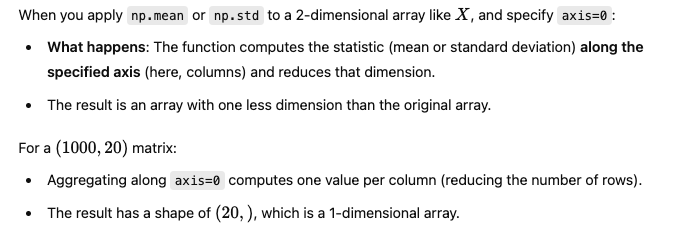

You can now take advantage of Broadcasting to calculate the mean normalized version of $X$ in just one line of code using the equation above. Fill in the code below

what happens in this Broadcasting is:
1) NumPy automatically prepends a dimension 1 to ave_cols and std_cols, so that they have the 2-D shape: (1,20)
2) NumPy automatically stretches these (1,20) arrays to match the shape of the larger X array: (1000,20)
3) NumPy calculates the mean normalization value elementwise for each cell in the (1000,20) matrix

In [18]:
# Mean normalize X
X_norm = (X - ave_cols)/std_cols
X_norm

array([[ 1.59138276,  1.3294877 ,  0.10715774, ..., -1.43881042,
        -1.64675606,  1.57690018],
       [ 1.64450068, -0.60774266,  1.01766279, ...,  0.08731369,
         0.88093357,  1.34599313],
       [-1.08038001,  0.67157366, -0.56294082, ...,  1.31839173,
        -1.45457259, -0.47222704],
       ...,
       [ 1.05675426,  1.71215916,  0.53823145, ...,  1.14232694,
         0.25599655,  0.79084834],
       [ 1.41340321, -0.47714286,  1.37689088, ..., -1.49795719,
         1.60468832,  1.64949072],
       [ 0.77874745, -0.53471911, -1.36222332, ..., -1.42436761,
        -1.15607487,  0.66917277]])

If you have performed the mean normalization correctly, then the average of all the elements in $X_{\tiny{\mbox{norm}}}$ should be close to zero, and they should be evenly distributed in some small interval around zero. You can verify this by filing the code below:

In [43]:
# Print the average of all the values of X_norm
print(f"Average of all the values of X_norm: \n\n{np.mean(X_norm)}")
print("\n\n")

# Print the average of the minimum values of the columns of X_norm
print(f"The minimum values in each column of X_norm: \n\n{np.min(X_norm, axis = 0)}")
print()
print(f"The average of the minimum values of the columns of X_norm: \n\n{np.mean(np.min(X_norm, axis = 0))}")
print("\n\n")

# Print the average of the maximum values of the columns of X_norm
print(f"The maximum values in each column of X_norm: \n\n{np.max(X_norm, axis = 0)}")
print()
print(f"The average of the maximum values of the columns of X_norm: \n\n{np.mean(np.max(X_norm, axis = 0))}")

Average of all the values of X_norm: 

2.1316282072803006e-17



The minimum values in each column of X_norm: 

[-1.74400919 -1.75645917 -1.73803117 -1.76345323 -1.68252347 -1.72773476
 -1.71375074 -1.72964032 -1.75100439 -1.72701605 -1.69998595 -1.76321198
 -1.77006335 -1.72413004 -1.71784281 -1.74957824 -1.68677678 -1.66439344
 -1.7074097  -1.73253706]

The average of the minimum values of the columns of X_norm: 

-1.7274775919969652



The maximum values in each column of X_norm: 

[1.70313736 1.74586233 1.70986769 1.77047439 1.71236996 1.74218117
 1.72664103 1.80080677 1.68888549 1.79793821 1.68877337 1.71805943
 1.71421179 1.71086702 1.75119633 1.71826267 1.7919412  1.77162102
 1.70009855 1.7193159 ]

The average of the maximum values of the columns of X_norm: 

1.7341255841545784


You should note that since $X$ was created using random integers, the above values will vary. 

# Data Separation

After the data has been mean normalized, it is customary in machine learnig to split our dataset into three sets:

1. A Training Set
2. A Cross Validation Set
3. A Test Set

The dataset is usually divided such that the Training Set contains 60% of the data, the Cross Validation Set contains 20% of the data, and the Test Set contains 20% of the data. 

In this part of the lab you will separate `X_norm` into a Training Set, Cross Validation Set, and a Test Set. Each data set will contain rows of `X_norm` chosen at random, making sure that we don't pick the same row twice. This will guarantee that all the rows of `X_norm` are chosen and randomly distributed among the three new sets.

You will start by creating a rank 1 ndarray that contains a random permutation of the row indices of `X_norm`. You can do this by using the `np.random.permutation()` function. The `np.random.permutation(N)` function creates a random permutation of integers from 0 to `N - 1`. Let's see an example:

In [44]:
# We create a random permutation of integers 0 to 4
np.random.permutation(5)

array([1, 2, 4, 3, 0])

# To Do

In the space below create a rank 1 ndarray that contains a random permutation of the row indices of `X_norm`. You can do this in one line of code by extracting the number of rows of `X_norm` using the `shape` attribute and then passing it to the  `np.random.permutation()` function. Remember the `shape` attribute returns a tuple with two numbers in the form `(rows,columns)`.

In [48]:
# Create a rank 1 ndarray that contains a random permutation of the row indices of `X_norm`
print(X_norm.shape)
row_indices = np.random.permutation(X_norm.shape[0])
print(row_indices)
print(row_indices.shape)

(1000, 20)
[213 790 922 381 666 468 410 568  17 335 753 207 271 974  23 664 197 919
  18 813 401  57 448 536 195 836 133 621 415 200 366 338 461 939 881 324
 521 184  70 593  88 245 352 247 152 355 920 223 359 602 270 714 685 204
  69 857 144 698  97 103 413 179 708 604 670 292 764 745 545 925 946 657
 807 130 453 201 560 878 967 872 309 759 321 916 543 502 276 776 444  40
 849 584 610 769  47  31 620 314  22 189 669 167 202 567 242 732 234 287
 325 594 634 810 901 161 811 999 989 451 159 537 517 693 808 283 721 373
 924 411 921 534 158 866 315 522 750 703 780  68 479 327 544 802 883 716
 969 744 311 504 899 941 558 742 868 977 842 564 295 824 705 845 119  62
 419 839 933 809 675 506 834 328  64 437 350 799 135 886 308 910   5 770
  16  80 164 143 678 257 182 787  94 540 349 636 365 844 914 500 683 741
 601 473 985 150  83 971  21 146 785 976 147 496 452  25  90  28   0 177
 371 917 843  89 965  76 447 424 400 629 608  29 396 470  59 794 835 460
 553 562 926 175 339 948 481 616 290 302

Now you can create the three datasets using the `row_indices` ndarray to select the rows that will go into each dataset. Rememeber that the Training Set contains 60% of the data, the Cross Validation Set contains 20% of the data, and the Test Set contains 20% of the data. Each set requires just one line of code to create. Fill in the code below

In [59]:
# Make any necessary calculations.
# You can save your calculations into variables to use later.
percentile_60 = int(len(row_indices)*0.6)
percentile_80 = int(len(row_indices)*0.8)

# Create a Training Set
X_train = X_norm[row_indices[:percentile_60],:]
print(X_train.shape)
# Create a Cross Validation Set
X_crossVal = X_norm[row_indices[percentile_60:percentile_80],:]
print(X_crossVal.shape)
# Create a Test Set
X_test = X_norm[row_indices[percentile_80:],:]
print(X_test.shape)

(600, 20)
(200, 20)
(200, 20)
